In [231]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [232]:
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [233]:
dta = pd.read_csv(r"C:\toyo\Toyoto_Corrola.csv")
dta.head()

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170


In [234]:
dta2=dta.drop('Cylinders',axis=1)

In [236]:
dta4=dta2.rename({'Age_08_04':'Age'},axis=1)

In [238]:
dta5=dta4.drop('Model',axis=1)

In [240]:
dta6=dta5.drop('Id',axis=1)
dta6.head()

,Price,Age,KM,HP,Doors,Gears,Weight
0,13500,23,46986,90,3,5,1165
1,13750,23,72937,90,3,5,1165
2,13950,24,41711,90,3,5,1165
3,14950,26,48000,90,3,5,1165
4,13750,30,38500,90,3,5,1170


In [241]:
dta6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1436 non-null   int64
 1   Age     1436 non-null   int64
 2   KM      1436 non-null   int64
 3   HP      1436 non-null   int64
 4   Doors   1436 non-null   int64
 5   Gears   1436 non-null   int64
 6   Weight  1436 non-null   int64
dtypes: int64(7)
memory usage: 78.7 KB


In [242]:
dta6.isna().sum()

Price     0
Age       0
KM        0
HP        0
Doors     0
Gears     0
Weight    0
dtype: int64

In [243]:
dta6.corr()

,Price,Age,KM,HP,Doors,Gears,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.185326,0.063104,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.148359,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,-0.036197,0.015023,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.092424,0.209477,0.089614
Doors,0.185326,-0.148359,-0.036197,0.092424,1.000000,-0.160141,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,-0.160141,1.000000,0.020613
Weight,0.581198,-0.470253,-0.028598,0.089614,0.302618,0.020613,1.000000


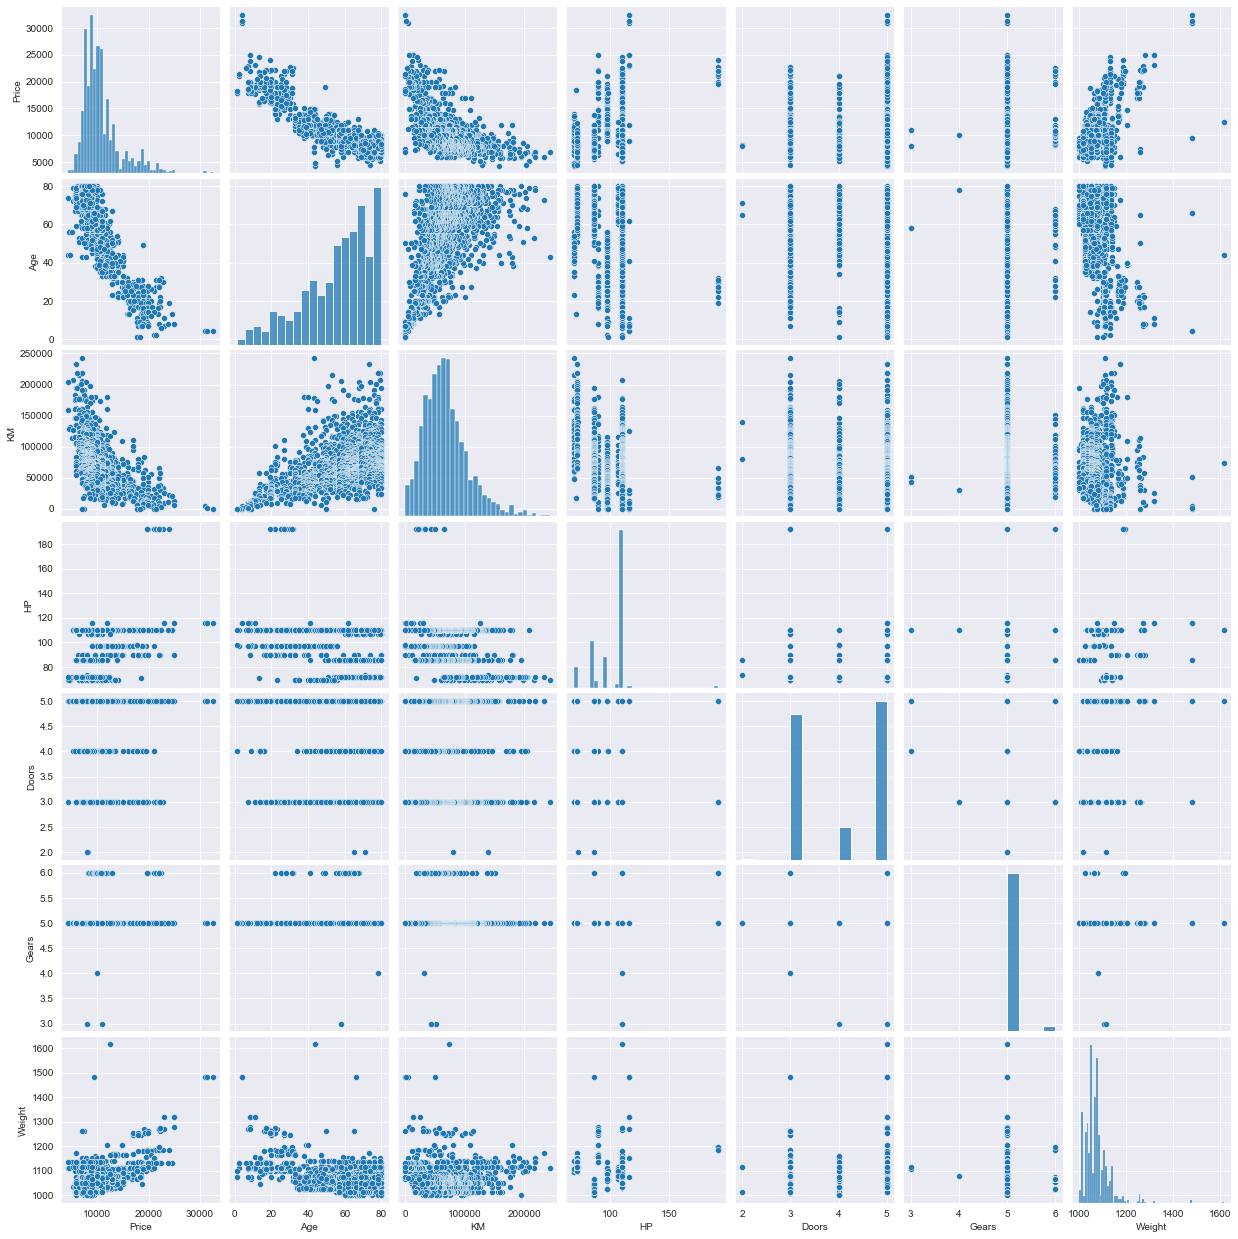

In [168]:
sns.set_style(style='darkgrid')
sns.pairplot(dta6)

In [169]:
dta6.value_counts()

Price  Age  KM      HP   Doors  Gears  Weight
24950  8    13253   116  5      5      1320      2
32500  4    1       116  5      5      1480      1
8950   57   65000   110  4      5      1035      1
       53   90200   97   3      5      1025      1
            115113  97   3      5      1025      1
                                                ..
10950  56   35230   97   3      5      1025      1
            46500   86   5      5      1035      1
       57   40214   86   3      5      1025      1
            55000   110  5      5      1075      1
4350   44   158320  69   5      5      1110      1
Length: 1435, dtype: int64

In [244]:
import statsmodels.formula.api as smf 
model = smf.ols('Price~Age+KM+HP+Doors+Gears+Weight',data=dta6).fit()


In [245]:
#Coefficients
model.params

Intercept   -6984.373566
Age          -122.242218
KM             -0.019994
HP             28.350149
Doors          -9.680229
Gears         622.282925
Weight         18.609651
dtype: float64

In [246]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept    -5.323309
Age         -46.728942
KM          -16.542560
HP           10.842418
Doors        -0.242055
Gears         3.152234
Weight       22.446903
dtype: float64 
 Intercept     1.181900e-07
Age          4.387432e-290
KM            2.238900e-56
HP            2.231791e-26
Doors         8.087723e-01
Gears         1.653931e-03
Weight        7.856458e-96
dtype: float64


In [247]:
#R squared values
(model.rsquared,model.rsquared_adj)


(0.8628024511073656, 0.8622263942190831)

In [248]:
ml_v=smf.ols('Price~Doors',data = dta6).fit()  
#t and p-Values

print(ml_v.tvalues, '\n', ml_v.pvalues) 

Intercept    19.258097
Doors         7.141657
dtype: float64 
 Intercept    1.094732e-73
Doors        1.461237e-12
dtype: float64


In [257]:
rsq_Age = smf.ols('Age~KM+HP+Doors+Gears+Weight',data=dta6).fit().rsquared  
vif_Age = 1/(1-rsq_Age) # 16.33

rsq_KM = smf.ols('KM~Age+HP+Doors+Gears+Weight',data=dta6).fit().rsquared  
vif_KM = 1/(1-rsq_KM) # 564.98
    
rsq_HP = smf.ols('HP~Age+KM+Doors+Gears+Weight',data=dta6).fit().rsquared  
vif_HP = 1/(1-rsq_HP) #  564.84

rsq_Doors = smf.ols('Doors~Age+KM+HP+Gears+Weight',data=dta6).fit().rsquared  
vif_Doors = 1/(1-rsq_Doors) #  16.35

rsq_Gears = smf.ols('Gears~Doors+Age+KM+HP+Weight',data=dta6).fit().rsquared  
vif_Gears = 1/(1-rsq_Gears) #  16.35

rsq_Weight = smf.ols('Weight~Gears+Doors+Age+KM+HP+Gears',data=dta6).fit().rsquared  
vif_Weight = 1/(1-rsq_Weight) #  16.35

# Storing vif values in a data frame
d1 = {'Variables':['Age','KM','HP','Doors','Gears','Weight'],'VIF':[vif_Age,vif_KM,vif_HP,vif_Doors,vif_Gears,vif_Weight]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Age,1.874542
1,KM,1.627039
2,HP,1.214909
3,Doors,1.149301
4,Gears,1.096501
5,Weight,1.508041


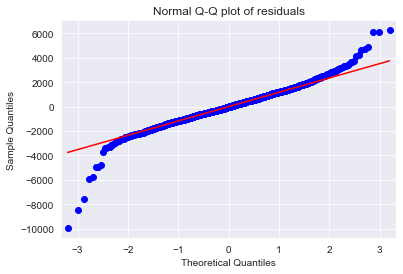

In [254]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [255]:
list(np.where(model.resid>100))

[array([   6,    7,    8,   10,   13,   14,   15,   16,   17,   18,   19,
          20,   21,   22,   23,   24,   26,   28,   29,   32,   35,   36,
          38,   41,   43,   45,   46,   47,   49,   51,   52,   53,   58,
          59,   61,   62,   63,   64,   65,   66,   68,   69,   70,   72,
          74,   75,   76,   77,   78,   80,   81,   83,   84,   85,   89,
          90,   91,   92,   94,   95,   98,   99,  100,  102,  103,  104,
         105,  106,  107,  108,  109,  110,  111,  112,  113,  114,  115,
         116,  118,  119,  120,  121,  123,  125,  127,  128,  136,  138,
         139,  141,  142,  143,  144,  146,  147,  148,  149,  150,  151,
         152,  153,  154,  156,  157,  158,  159,  160,  161,  162,  163,
         165,  166,  167,  168,  169,  170,  171,  172,  173,  174,  175,
         176,  177,  178,  179,  180,  182,  183,  190,  194,  196,  197,
         201,  204,  210,  211,  216,  223,  230,  232,  233,  237,  238,
         245,  247,  248,  253,  257, 

In [92]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

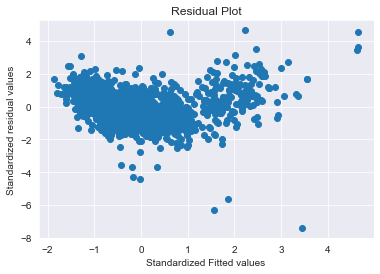

In [93]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

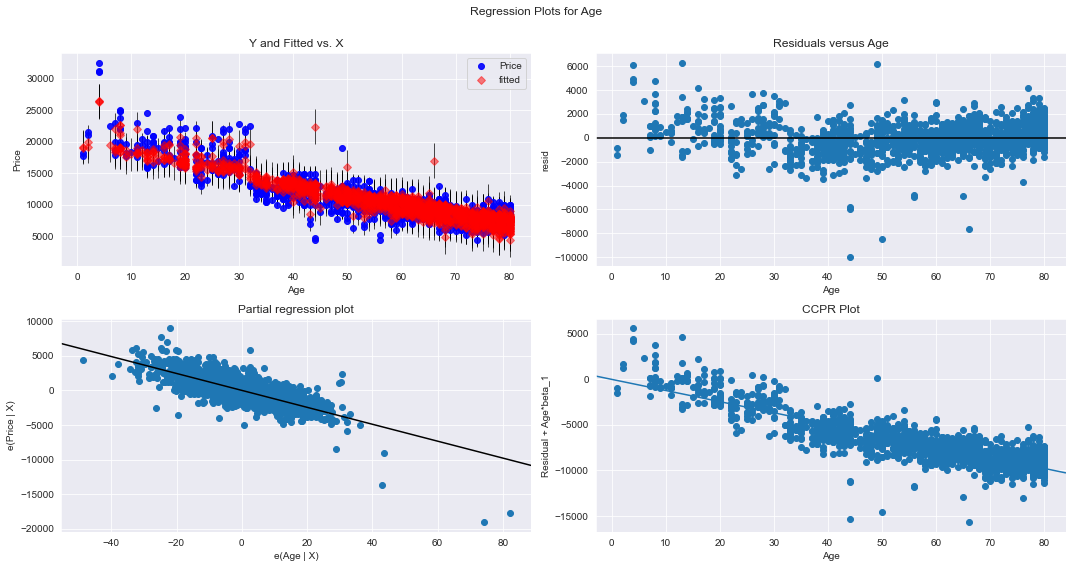

In [94]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age", fig=fig)
plt.show()

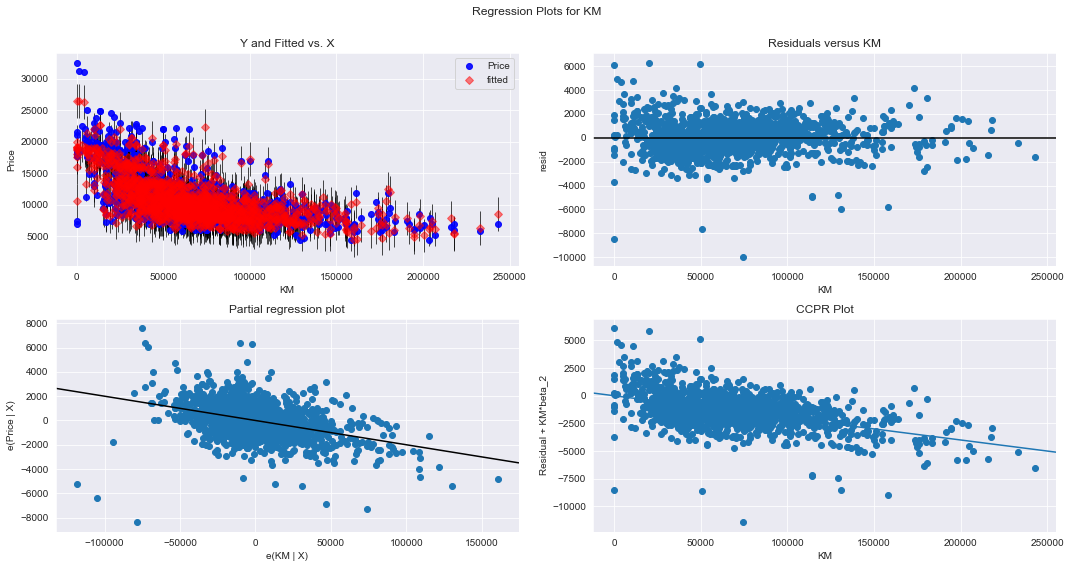

In [78]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

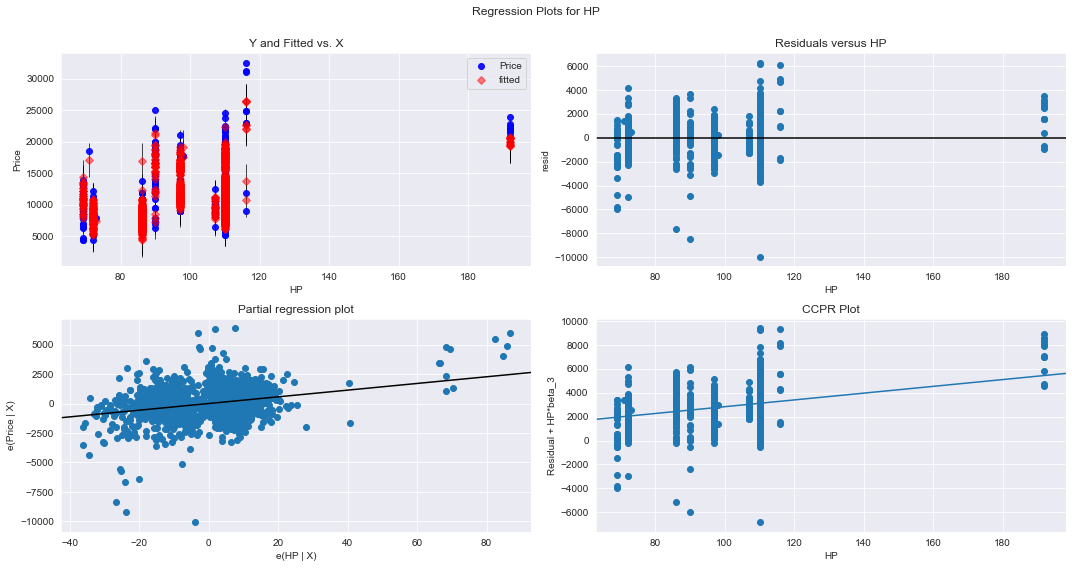

In [80]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

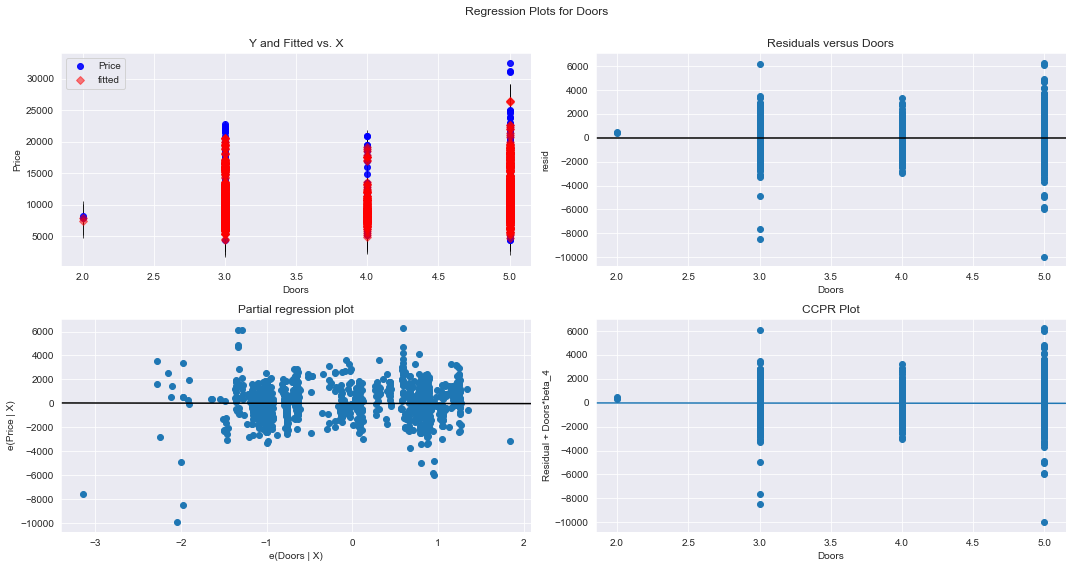

In [81]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

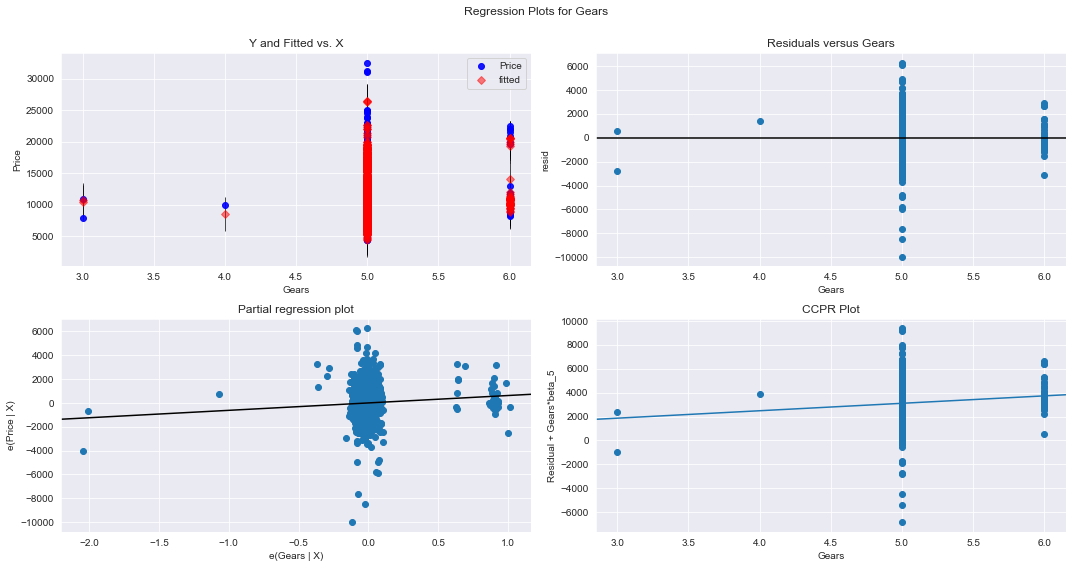

In [82]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

In [83]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

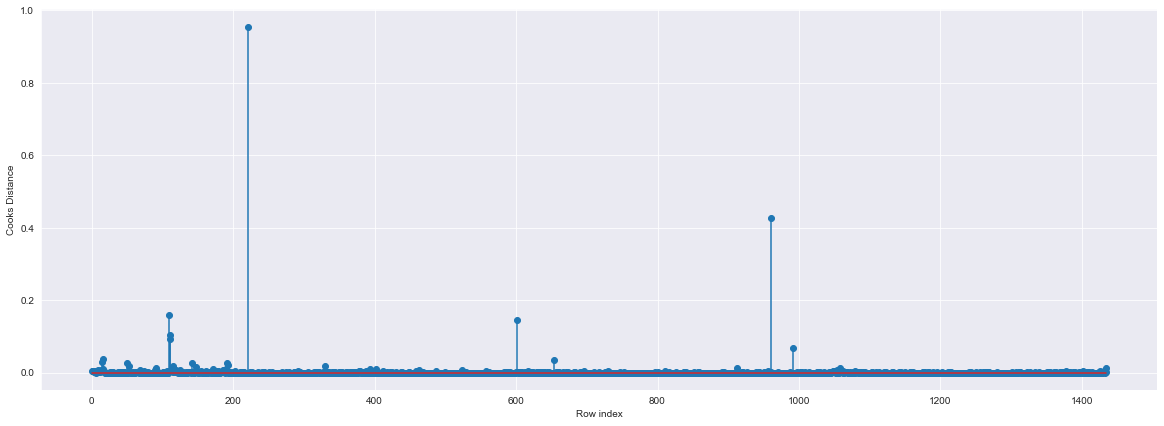

In [85]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(dta6)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [86]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(221, 0.95531514386949)

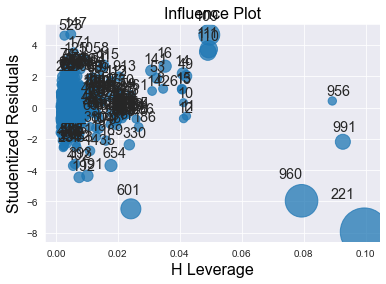

In [87]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [88]:
k = dta6.shape[1]
n = dta6.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [89]:
leverage_cutoff

0.016713091922005572

In [102]:
dta6[dta6.index.isin(['221','960','991','956'])]

,Price,Age,KM,HP,Doors,Gears,Weight
221,12450,44,74172,110,5,5,1615
956,10950,58,51421,110,5,3,1105
960,9390,66,50806,86,3,5,1480
991,7950,58,43000,110,4,3,1114


In [104]:
dta7=dta6.drop(dta6.index[[221,960,991,956]],axis=0).reset_index()

In [128]:
dta77=dta7.drop(['index'],axis=1)

In [129]:
dta8= smf.ols('Price~Age+KM+HP+Doors+Gears+Weight',data = dta77).fit()

In [118]:
(dta8.rsquared,dta8.aic)

(0.8733322820404419, 24594.88171135487)

In [119]:
print(dta8.tvalues, '\n', dta8.pvalues)

Intercept    -7.520983
Age         -44.758069
KM          -18.447124
HP           10.932172
Doors        -1.652518
Gears         2.039811
Weight       25.712246
dtype: float64 
 Intercept     9.577062e-14
Age          6.197456e-274
KM            2.610349e-68
HP            9.042993e-27
Doors         9.864920e-02
Gears         4.155323e-02
Weight       4.342520e-120
dtype: float64


In [120]:
model_influence_V = dta8.get_influence()
(c_V, _) = model_influence_V.cooks_distance

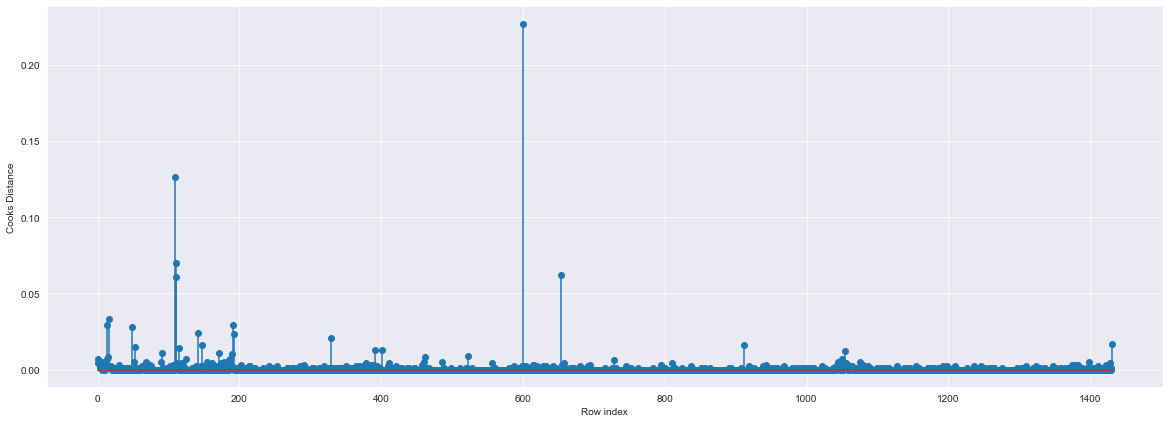

In [121]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(dta7)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [122]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(600, 0.22675754366825154)

In [130]:
dta9=dta77.drop(dta77.index[[600]],axis=0).reset_index()

In [133]:
dta99=dta9.drop(['index'],axis=1)

In [134]:
dta99.head()

,Price,Age,KM,HP,Doors,Gears,Weight
0,13500,23,46986,90,3,5,1165
1,13750,23,72937,90,3,5,1165
2,13950,24,41711,90,3,5,1165
3,14950,26,48000,90,3,5,1165
4,13750,30,38500,90,3,5,1170


In [258]:
dta10= smf.ols('Price~Age+KM+HP+Gears+Weight',data = dta99).fit()

In [259]:
print(dta10.tvalues, '\n', dta10.pvalues)

Intercept    -8.386117
Age         -44.734251
KM          -19.418236
HP           10.584560
Gears         2.522788
Weight       27.585896
dtype: float64 
 Intercept     1.192271e-16
Age          9.655311e-274
KM            1.046253e-74
HP            2.959194e-25
Gears         1.175096e-02
Weight       1.407572e-134
dtype: float64


In [260]:
(dta10.rsquared,dta10.aic)

(0.8776737469668932, 24526.015659695357)

In [261]:
pred_y = dta10.predict(dta6)

In [262]:
pred_y

0       16818.281730
1       16234.070834
2       16822.863446
3       16452.946021
4       16325.349083
            ...     
1431     8830.598174
1432     8292.415782
1433     8451.249230
1434     8567.669925
1435    11175.299622
Length: 1436, dtype: float64

In [143]:
dta6

,Price,Age,KM,HP,Doors,Gears,Weight
0,13500,23,46986,90,3,5,1165
1,13750,23,72937,90,3,5,1165
2,13950,24,41711,90,3,5,1165
3,14950,26,48000,90,3,5,1165
4,13750,30,38500,90,3,5,1170
...,...,...,...,...,...,...,...
1431,7500,69,20544,86,3,5,1025
1432,10845,72,19000,86,3,5,1015
1433,8500,71,17016,86,3,5,1015
1434,7250,70,16916,86,3,5,1015
